<a href="https://colab.research.google.com/github/ChristeenaGiji/Forecasting/blob/main/Forecasting_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forecasting Timeseries Data Using Facebook FbProphet
Steps Required With FbProphet

Introduction And Installation
Data Preprocessing With Time Seires
Model Fitting
Obtaining The Forecasts
Plotting The Forecasts
Cross Validation
Computing Performance Metrics
Visualize the Performance MEtrics
Conclusions

In [12]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('/content/monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [6]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [7]:
df.drop(168,axis=0,inplace=True)

In [8]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [9]:
df.columns=["ds","y"]

<Axes: >

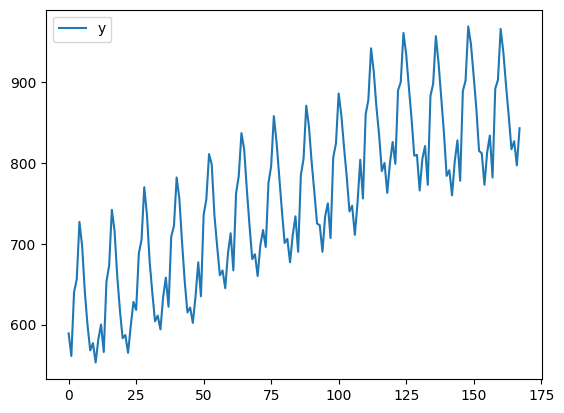

In [10]:

df.plot()

In [13]:

df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [14]:
df['ds']=pd.to_datetime(df['ds'])

In [16]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<Axes: >

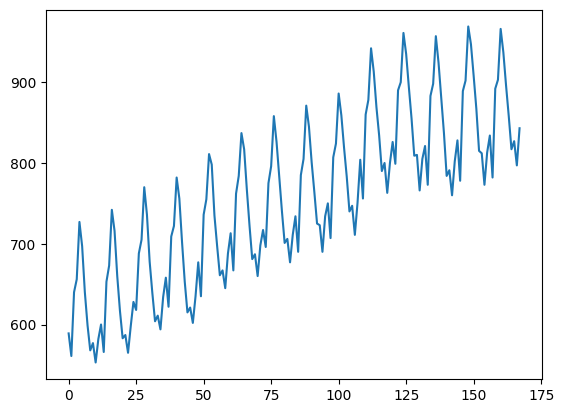

In [17]:
df['y'].plot()

In [18]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<Axes: >

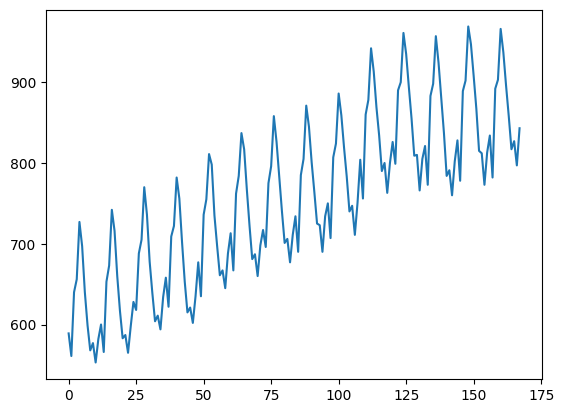

In [19]:
df['y'].plot()

In [20]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot

In [21]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [22]:
### intiialize the Model
model=Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxp8k5rk5/jl9eba1p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxp8k5rk5/1w_b796n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40989', 'data', 'file=/tmp/tmpxp8k5rk5/jl9eba1p.json', 'init=/tmp/tmpxp8k5rk5/1w_b796n.json', 'output', 'file=/tmp/tmpxp8k5rk5/prophet_modellxqc5gl5/prophet_model-20240717094639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:46:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:46:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

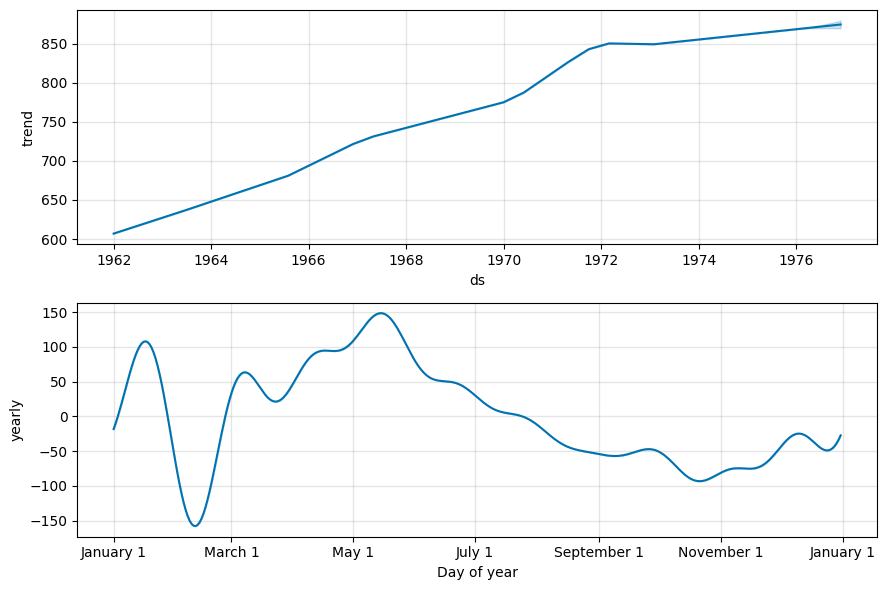

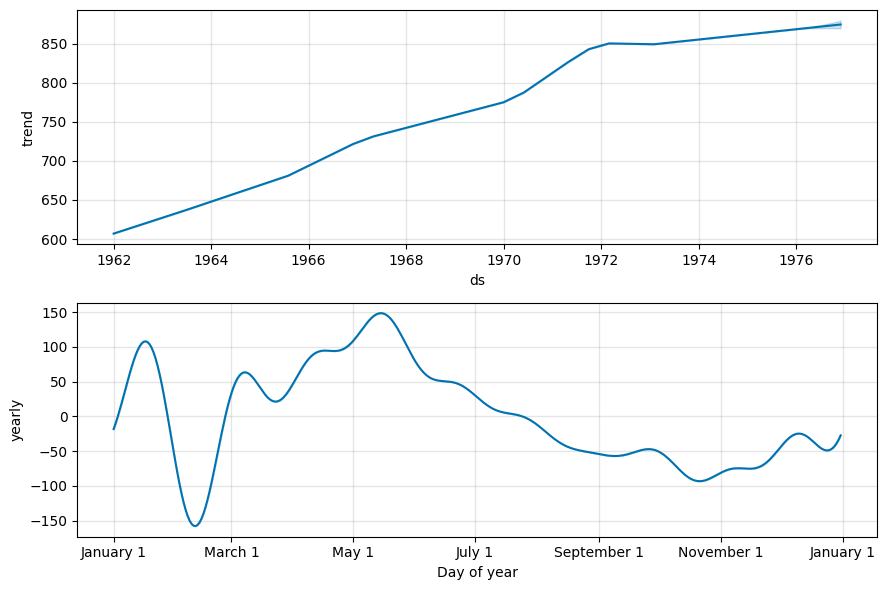

In [35]:
model.plot_components(prediction)

In [36]:
df.tail()

,ds,y
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [23]:
model

In [37]:
model.seasonality_mode

'additive'

In [26]:
#### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [27]:
df.tail()

,ds,y
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [28]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


#Prediction

In [29]:
prediction=model.predict(future_dates)

In [30]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.955437,576.757277,596.854691,606.955437,606.955437,-20.137031,-20.137031,-20.137031,-20.137031,-20.137031,-20.137031,0.0,0.0,0.0,586.818406
1,1962-02-01,608.670887,536.593232,556.361317,608.670887,608.670887,-62.555086,-62.555086,-62.555086,-62.555086,-62.555086,-62.555086,0.0,0.0,0.0,546.115802
2,1962-03-01,610.220326,632.516085,651.516102,610.220326,610.220326,31.391552,31.391552,31.391552,31.391552,31.391552,31.391552,0.0,0.0,0.0,641.611878
3,1962-04-01,611.935777,649.227731,669.517711,611.935777,611.935777,46.719774,46.719774,46.719774,46.719774,46.719774,46.719774,0.0,0.0,0.0,658.655551
4,1962-05-01,613.595890,712.504858,731.481915,613.595890,613.595890,108.057725,108.057725,108.057725,108.057725,108.057725,108.057725,0.0,0.0,0.0,721.653615


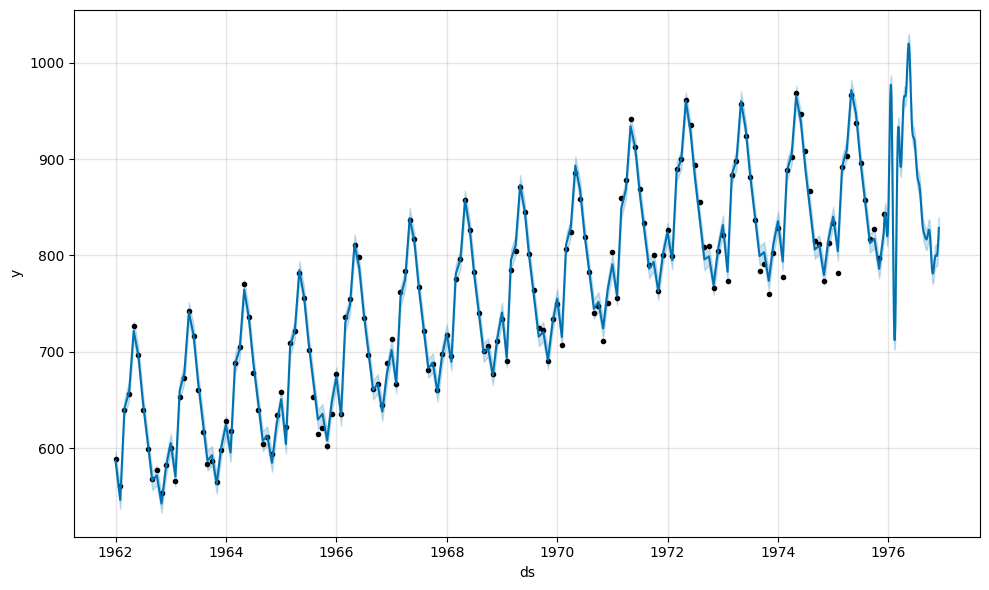

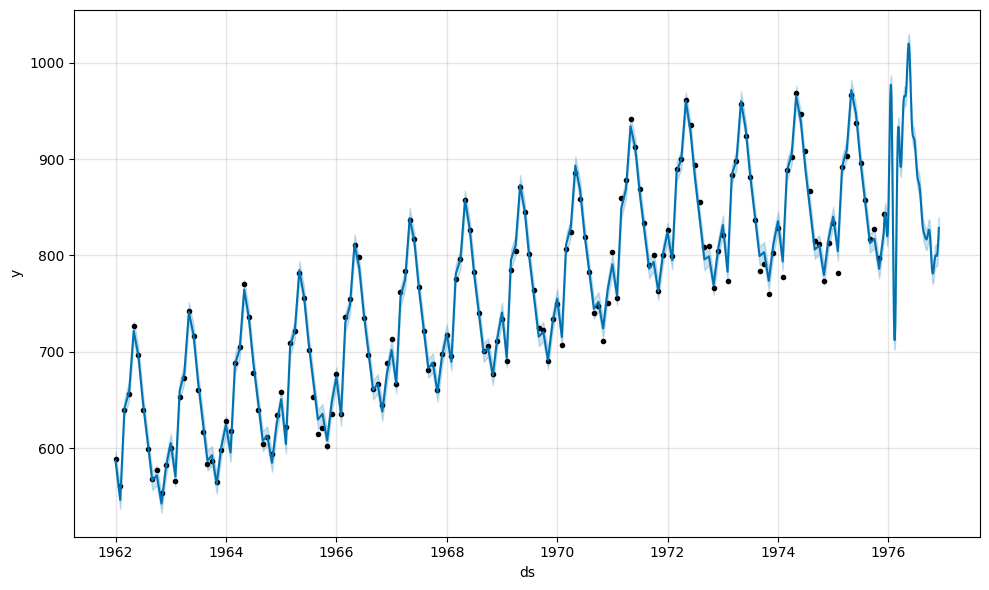

In [38]:
### plot the predicted projection
model.plot(prediction)

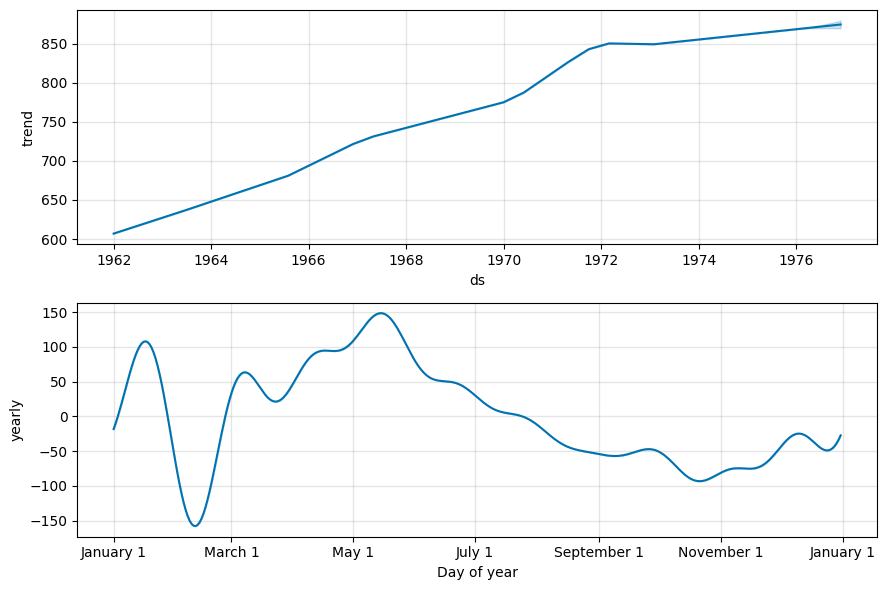

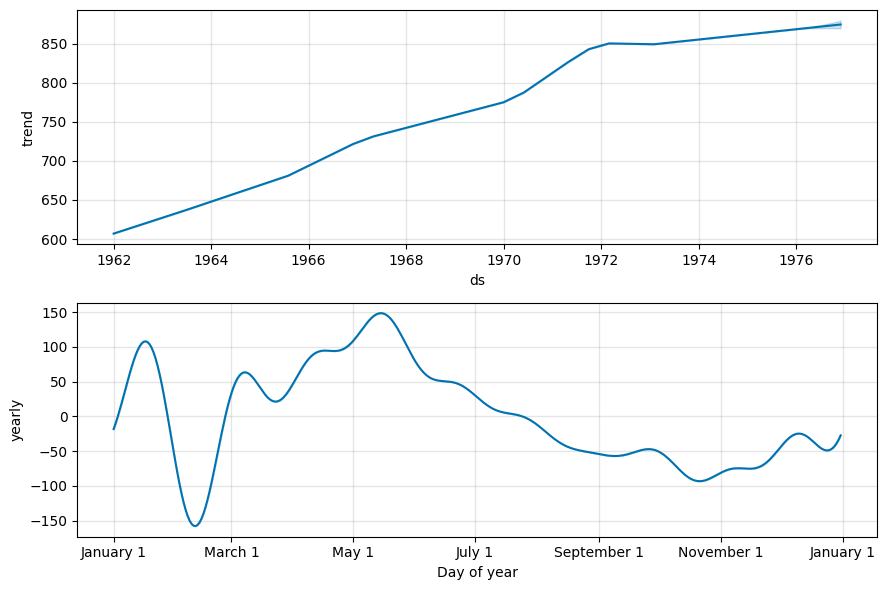

In [39]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

Time Series Analysis

1974-1976
Cross Validation
1974-75---Train dataset
1975-76--Test dataset
1962-63---Validation

In [40]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [42]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 23 forecasts with cutoffs between 1964-01-28 00:00:00 and 1974-12-01 00:00:00


  0%|          | 0/23 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxp8k5rk5/rw4a086d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxp8k5rk5/sxymr08k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9833', 'data', 'file=/tmp/tmpxp8k5rk5/rw4a086d.json', 'init=/tmp/tmpxp8k5rk5/sxymr08k.json', 'output', 'file=/tmp/tmpxp8k5rk5/prophet_modelznwfsonh/prophet_model-20240717114026.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:40:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:40:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxp8k5rk5/srwzpcjm.json
DEBUG:cmdstanpy:input tempfil

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1964-02-01,580.233690,579.080638,581.306741,618.0,1964-01-28
1,1964-03-01,667.142222,663.468454,670.778640,688.0,1964-01-28
2,1964-04-01,694.408009,687.171588,701.796408,705.0,1964-01-28
3,1964-05-01,774.598759,762.615351,786.457734,770.0,1964-01-28
4,1964-06-01,735.427301,718.079672,752.108034,736.0,1964-01-28


In [43]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,296.827836,17.228692,13.145445,0.017535,0.013782,0.017606,0.370370
1,38 days,244.915697,15.649783,11.930638,0.015531,0.010029,0.015530,0.407407
2,41 days,247.541262,15.733444,12.071467,0.015715,0.013782,0.015720,0.407407
3,42 days,263.215282,16.223911,12.646630,0.016474,0.014528,0.016485,0.370370
4,43 days,264.734610,16.270667,12.822824,0.016752,0.014528,0.016768,0.370370


In [44]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,296.827836,17.228692,13.145445,0.017535,0.013782,0.017606,0.370370
1,38 days,244.915697,15.649783,11.930638,0.015531,0.010029,0.015530,0.407407
2,41 days,247.541262,15.733444,12.071467,0.015715,0.013782,0.015720,0.407407
3,42 days,263.215282,16.223911,12.646630,0.016474,0.014528,0.016485,0.370370
4,43 days,264.734610,16.270667,12.822824,0.016752,0.014528,0.016768,0.370370


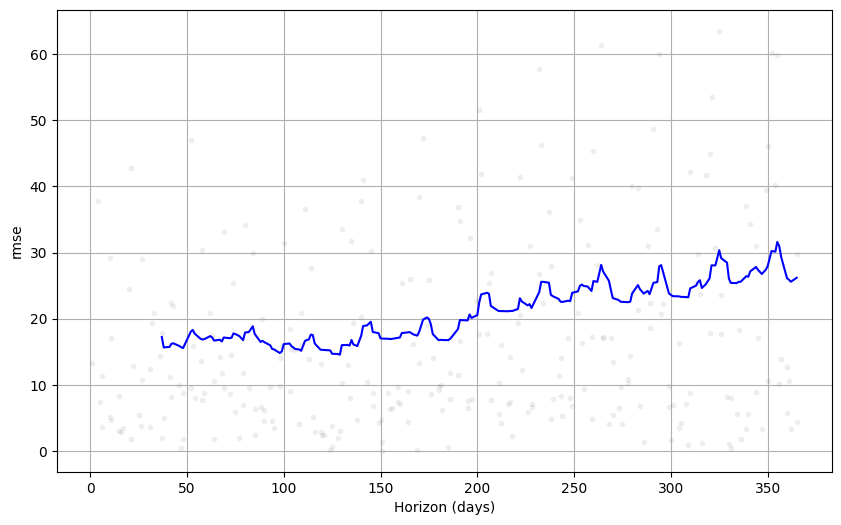

In [46]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')